# Exploring 1st Iteration Data

### Setup

In [1]:
# General Imports
import nltk

In [2]:
# Add path to custom code
#  This is a bit of a hack to add the directory, in a general way, to path to load code
#  This hack
import os
import sys

# Set project related paths
base_path = os.path.dirname(os.getcwd())
dat_path = os.path.join(base_path, 'Data')

In [3]:
# Import custom code
sys.path.append(base_path)
from data import load_folder

### Functions

These are some quick functions to work with the data

In [4]:
from itertools import chain

In [5]:
def get_all_words(dat, field):
    
    all_words = [getattr(doc, field) for doc in dat] # for doc in all_docs]
    all_words = list(chain.from_iterable(all_words))
    
    return all_words

### Loading

In [6]:
# Load the data
paper_dat = load_folder('Papers', 'autism', dat_path)

# This is a hack to force load a particular folder, to get started.
#  I'm not sure, what the intended way to load all PRs is - fix this when sorted.
press_dat = load_folder('PRs', 'autism', dat_path)

#### Sanity Check Loaded Data

In [7]:
# Check data sizes
print(len(paper_dat))
print(len(press_dat))
# Note: each of these elements is itself a list of objects

498
333


### Pre-Processing

In [8]:
# Collapse across all words in a given data type
all_paper_words = get_all_words(paper_dat, 'words')
all_press_words = get_all_words(press_dat, 'words')

### NLTK 

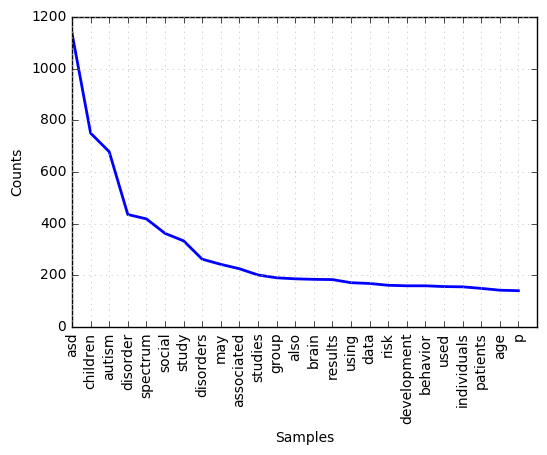

In [9]:
# Create and plot the frequency distribution of words - papers
paper_fd = nltk.FreqDist(all_paper_words)
paper_fd.plot(25)

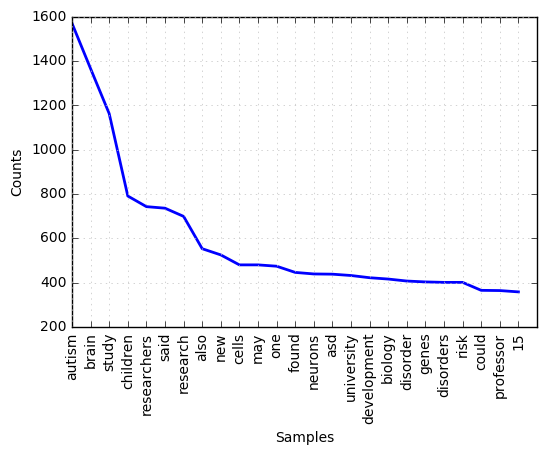

In [10]:
# Create and plot the frequency distribution of words - PRs
press_fd = nltk.FreqDist(all_press_words)
press_fd.plot(25)

### Sentence Polarity

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

/Users/wdfox/anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
paper_polarities = []

for p in paper_dat:
    for sent in p.sentences:
        paper_polarities.append(sia.polarity_scores(sent)['compound'])

print(len(paper_polarities))

3762


In [13]:
press_polarities = []

for p in press_dat:
    for sent in p.sentences:
        press_polarities.append(sia.polarity_scores(sent)['compound'])
        
print(len(press_polarities))

6864


In [14]:
# Plotting polarity
import matplotlib.pyplot as plt
import numpy as np
import math

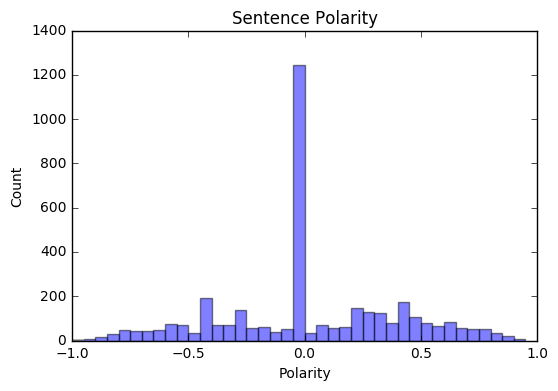

In [15]:
# bins = np.linspace(math.ceil(min(polarities)), 
#                    math.floor(max(polarities)), 20)

bins = np.arange(-1, 1, 0.05)

plt.xlim([-1, 1])

plt.hist(paper_polarities, bins=bins, alpha=0.5)
plt.title('Sentence Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')

plt.show()

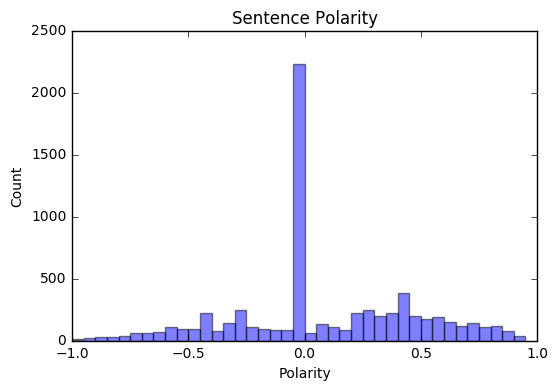

In [16]:
plt.xlim([-1, 1])

plt.hist(press_polarities, bins=bins, alpha=0.5)
plt.title('Sentence Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')

plt.show()

### Readability

In [24]:
# sys.path.append(os.path.join(base_path, 'readability-master'))
from readability-master/readability import Readability

SyntaxError: invalid syntax (<ipython-input-24-d4c4aebef030>, line 2)

In [21]:
test = readability.Readability('This is a sample sentence.')

AttributeError: module 'readability' has no attribute 'Readability'